In [33]:
!pip install yfinance
!pip install matplotlib
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly
!pip install nbformat

In [34]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [35]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [66]:
tesla_stock = yf.Ticker("TLSA")
tesla_data = tesla_stock.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  Volume  \
0 2018-11-20 00:00:00-05:00  2.100840  2.100840  1.670668  1.670668   87465   
1 2018-11-21 00:00:00-05:00  1.838735  2.434974  1.838735  2.118848   38984   
2 2018-11-23 00:00:00-05:00  2.200880  2.200880  1.958784  1.960784   14994   
3 2018-11-26 00:00:00-05:00  1.940776  1.940776  1.552621  1.676671   24990   
4 2018-11-27 00:00:00-05:00  1.760704  1.800720  1.700680  1.792717   21991   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [67]:
tesla_rev = tesla_stock.financials.loc["Total Revenue"]

tesla_dataframe = pd.DataFrame(columns=["Date","Revenue"])

for date, revenue in tesla_rev.items():
    tesla_dataframe = pd.concat([tesla_dataframe, pd.DataFrame({"Date":[date],"Revenue":[revenue]})],ignore_index=True)

tesla_dataframe.head()

,Date,Revenue
0,2023-12-31,0.0
1,2022-12-31,0.0
2,2021-12-31,0.0
3,2020-12-31,0.0


In [72]:
gamestop_stock = yf.Ticker("GME")
gamestop_data = gamestop_stock.history(period="max")
gamestop_data.reset_index(inplace=True)
print(gamestop_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [73]:
GME_rev = gamestop_stock.financials.loc["Total Revenue"]

GME_dataframe = pd.DataFrame(columns=["Date","Revenue"])

for date, revenue in GME_rev.items():
    GME_dataframe = pd.concat([GME_dataframe, pd.DataFrame({"Date":[date],"Revenue":[revenue]})],ignore_index=True)

GME_dataframe.head()

,Date,Revenue
0,2024-01-31,5.272800e+09
1,2023-01-31,5.927200e+09
2,2022-01-31,6.010700e+09
3,2021-01-31,5.089800e+09


In [74]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

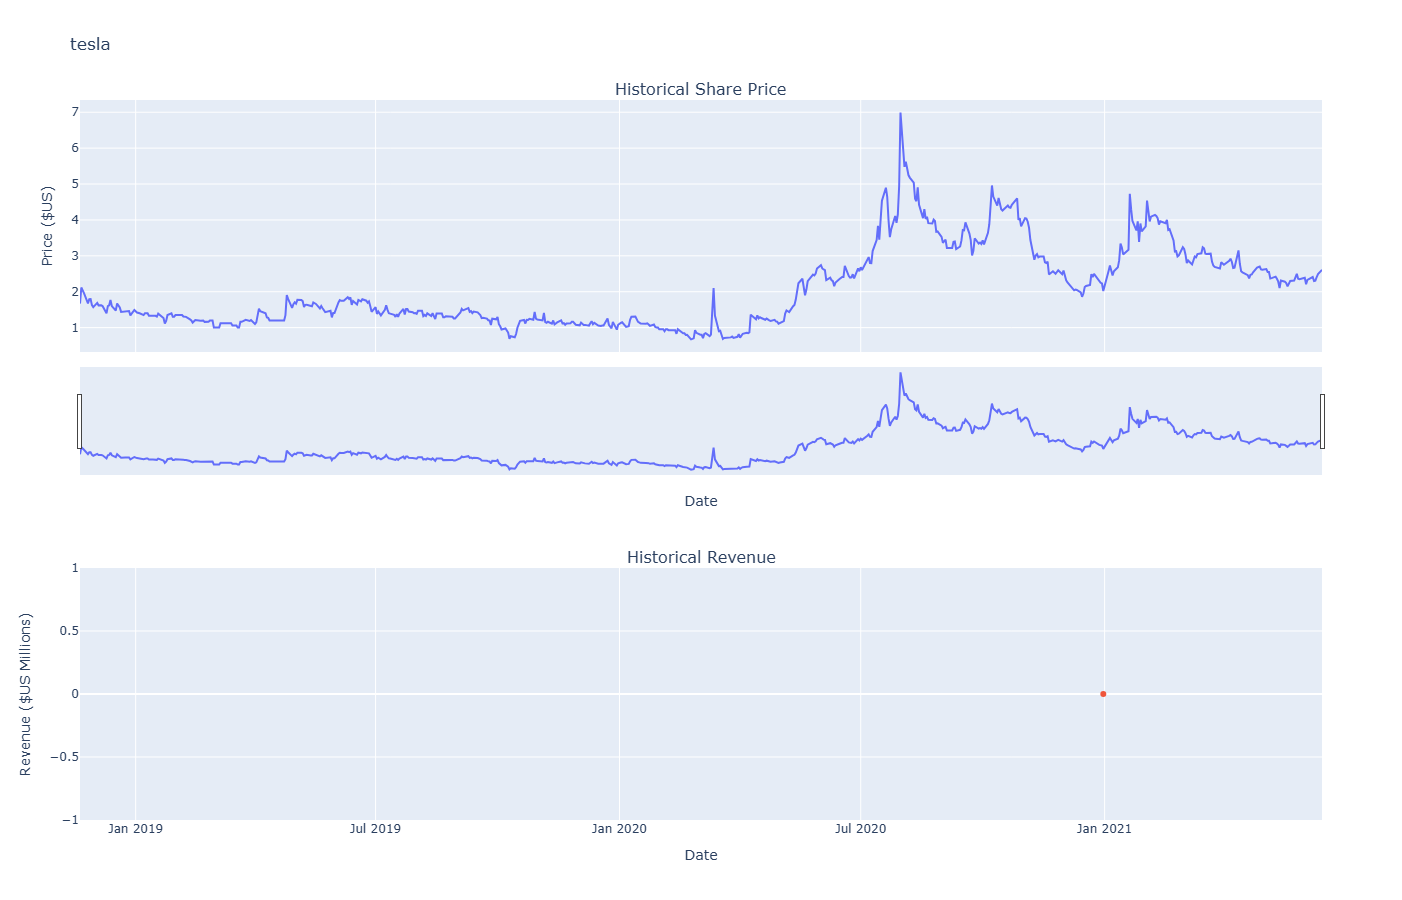

In [75]:
make_graph(tesla_data, tesla_dataframe, 'tesla')

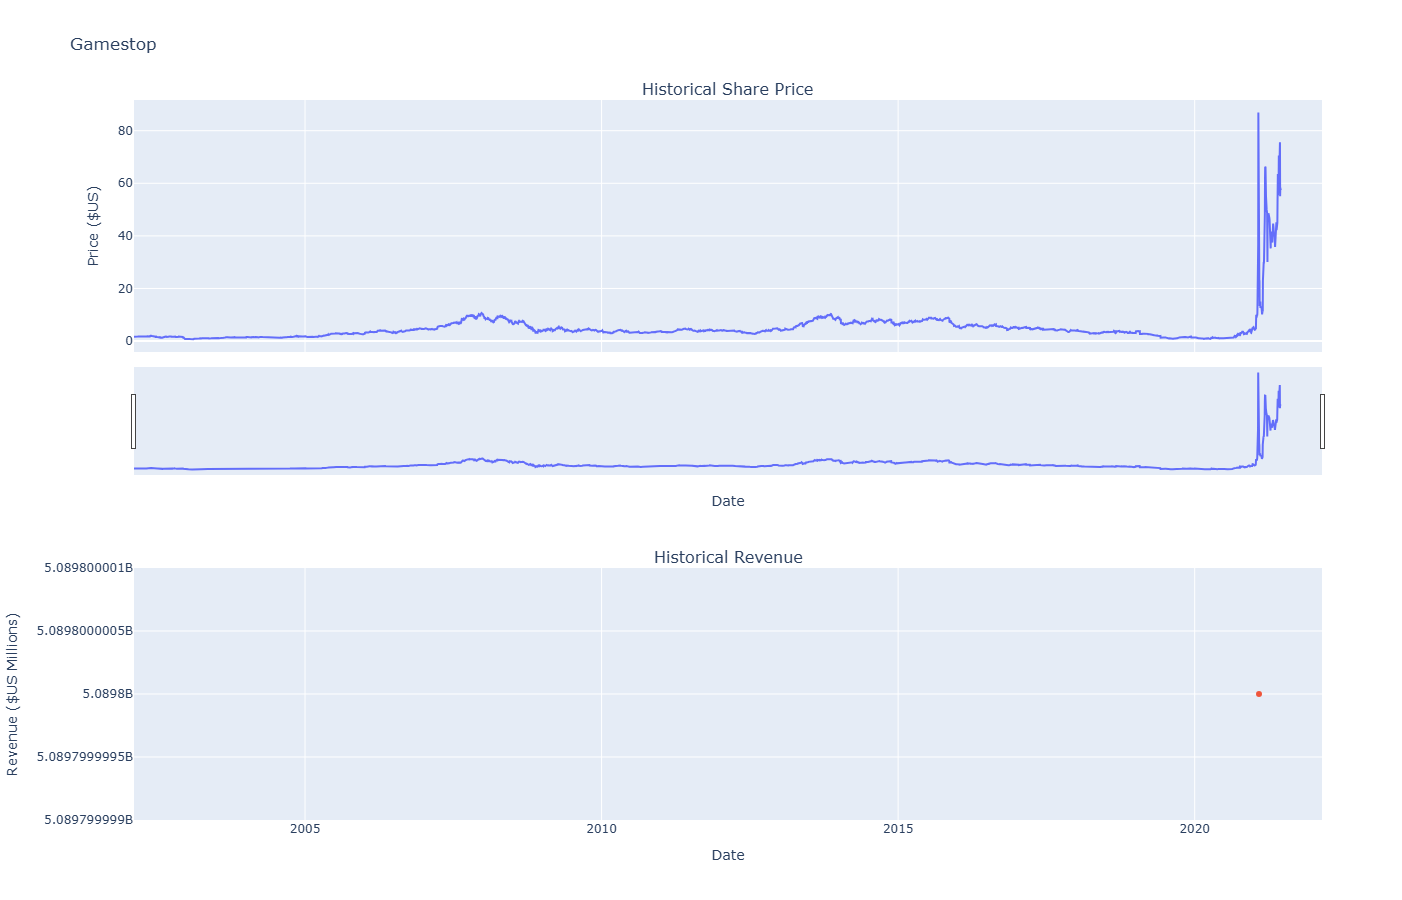

In [76]:
make_graph(gamestop_data, GME_dataframe, 'Gamestop')